In [1]:
import pandas as pd

# Load raw turbofan dataset
df = pd.read_csv("train_FD001.txt", sep=" ", header=None)
df = df.dropna(axis=1)  # remove trailing empty columns

# Assign column names
sensor_cols = [f"sensor_{i}" for i in range(1, 22)]
df.columns = ["engine_id","time","op1","op2","op3"] + sensor_cols

df.head()


,engine_id,time,op1,op2,op3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [2]:
engine = 1   # choose any engine_id
sensor = "sensor_11"

df_eng = df[df.engine_id == engine].copy()
df_eng["unique_id"] = f"engine_{engine}"
df_eng["ds"] = pd.to_datetime(df_eng["time"], unit='s')
df_eng = df_eng[["unique_id", "ds", sensor]].rename(columns={sensor: "y"})
df_eng.head()


,unique_id,ds,y
0,engine_1,1970-01-01 00:00:01,47.47
1,engine_1,1970-01-01 00:00:02,47.49
2,engine_1,1970-01-01 00:00:03,47.27
3,engine_1,1970-01-01 00:00:04,47.13
4,engine_1,1970-01-01 00:00:05,47.28


In [5]:
import timesfm
import numpy as np
# For PyTorch
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=128,
          input_patch_len=32,
          output_patch_len=128,
          num_layers=50,
          model_dims=1280,
          use_positional_embedding=False,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
)

    
forecast_input = [
    np.sin(np.linspace(0, 20, 100)),
    np.sin(np.linspace(0, 20, 200)),
    np.sin(np.linspace(0, 20, 400)),
]
frequency_input = [0, 1, 2]

point_forecast, experimental_quantile_forecast = tfm.forecast(
    forecast_input,
    freq=frequency_input,
)


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
c:\Users\kevor\anaconda3\envs\chroma-rules\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kevor\.cache\huggingface\hub\models--google--timesfm-2.0-500m-pytorch. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_D

In [7]:
experimental_quantile_forecast

array([[[ 0.98130226,  0.960659  ,  0.9690323 , ...,  0.99159324,
          0.9989655 ,  1.0110533 ],
        [ 1.0086195 ,  0.99246454,  0.99983895, ...,  1.0173664 ,
          1.0203617 ,  1.0285983 ],
        [ 0.99850506,  0.9877393 ,  0.99579096, ...,  1.0109341 ,
          1.0156573 ,  1.0237149 ],
        ...,
        [ 0.9786438 ,  0.9259246 ,  0.94953865, ...,  1.0080734 ,
          1.0195246 ,  1.0361445 ],
        [ 0.98559093,  0.93210256,  0.9563974 , ...,  1.0135419 ,
          1.0231415 ,  1.0424371 ],
        [ 0.94214463,  0.88344306,  0.9112736 , ...,  0.9759354 ,
          0.9896282 ,  1.0053475 ]],

       [[ 0.954419  ,  0.92649883,  0.9346705 , ...,  0.9565807 ,
          0.9690204 ,  0.9861038 ],
        [ 0.97891194,  0.9368537 ,  0.9502104 , ...,  0.9970214 ,
          1.0131716 ,  1.0406396 ],
        [ 0.99426705,  0.93290514,  0.958379  , ...,  1.0243715 ,
          1.0458419 ,  1.0788243 ],
        ...,
        [ 0.5277487 , -0.6167399 , -0.19776005, ...,  

In [ ]:
forecast_df = tfm.forecast_on_df(
    inputs = df_eng,
    freq   = "s",
    value_name = "y",
    forecast_context_len = 256,  # e.g., use last 256 points as context
    num_jobs = -1,
    verbose  = True
)


Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


c:\Users\kevor\anaconda3\envs\chroma-rules\lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kevor\anaconda3\envs\chroma-rules\lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [12]:
df_eng.head()

,unique_id,ds,y
0,engine_1,1970-01-01 00:00:01,47.47
1,engine_1,1970-01-01 00:00:02,47.49
2,engine_1,1970-01-01 00:00:03,47.27
3,engine_1,1970-01-01 00:00:04,47.13
4,engine_1,1970-01-01 00:00:05,47.28


In [14]:
forecast_df.head()

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,engine_1,1970-01-01 00:03:13,48.199856,48.078400,48.122532,48.154095,48.178204,48.199856,48.223866,48.247269,48.276024,48.314121
1,engine_1,1970-01-01 00:03:14,48.218529,48.092056,48.135994,48.169647,48.195686,48.218529,48.243374,48.267960,48.299530,48.338665
2,engine_1,1970-01-01 00:03:15,48.231514,48.104424,48.149742,48.180019,48.207237,48.231514,48.254814,48.280285,48.311089,48.352482
3,engine_1,1970-01-01 00:03:16,48.241051,48.120304,48.161453,48.192940,48.219284,48.241051,48.266518,48.291821,48.322403,48.366985
4,engine_1,1970-01-01 00:03:17,48.255550,48.132225,48.176506,48.207542,48.234348,48.255550,48.279976,48.305038,48.336800,48.381149


In [16]:
print("df_eng:", df_eng.shape)
print("forecast_df:", forecast_df.shape)

print("\nDtypes:")
print(df_eng[["unique_id","ds"]].dtypes)
print(forecast_df[["unique_id","ds"]].dtypes)

print("\nHead/tail:")
print(df_eng[["unique_id","ds"]].head(), df_eng[["unique_id","ds"]].tail(), sep="\n")
print(forecast_df[["unique_id","ds"]].head(), forecast_df[["unique_id","ds"]].tail(), sep="\n")

print("\nMin/max ds:")
print("df_eng:", df_eng["ds"].min(), "→", df_eng["ds"].max())
print("forecast_df:", forecast_df["ds"].min(), "→", forecast_df["ds"].max())


df_eng: (192, 3)
forecast_df: (128, 12)

Dtypes:
unique_id            object
ds           datetime64[ns]
dtype: object
unique_id            object
ds           datetime64[ns]
dtype: object

Head/tail:
  unique_id                  ds
0  engine_1 1970-01-01 00:00:01
1  engine_1 1970-01-01 00:00:02
2  engine_1 1970-01-01 00:00:03
3  engine_1 1970-01-01 00:00:04
4  engine_1 1970-01-01 00:00:05
    unique_id                  ds
187  engine_1 1970-01-01 00:03:08
188  engine_1 1970-01-01 00:03:09
189  engine_1 1970-01-01 00:03:10
190  engine_1 1970-01-01 00:03:11
191  engine_1 1970-01-01 00:03:12
  unique_id                  ds
0  engine_1 1970-01-01 00:03:13
1  engine_1 1970-01-01 00:03:14
2  engine_1 1970-01-01 00:03:15
3  engine_1 1970-01-01 00:03:16
4  engine_1 1970-01-01 00:03:17
    unique_id                  ds
123  engine_1 1970-01-01 00:05:16
124  engine_1 1970-01-01 00:05:17
125  engine_1 1970-01-01 00:05:18
126  engine_1 1970-01-01 00:05:19
127  engine_1 1970-01-01 00:05:20

Min/ma

Metrics: {'mae': nan, 'rmse': nan, 'mape': nan}


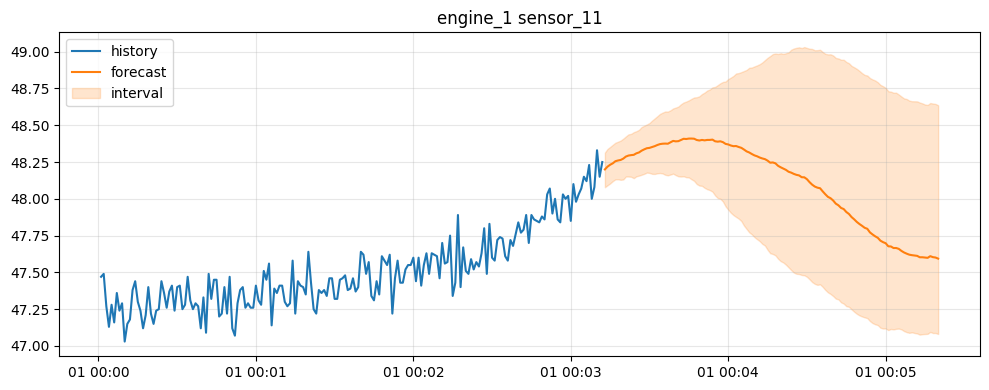

In [24]:
import os
from typing import Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def make_engine_series(df: pd.DataFrame, engine_id: int, sensor: str) -> pd.DataFrame:
  df_e = (
    df[df.engine_id == engine_id][["engine_id", "time", sensor]]
    .rename(columns={sensor: "y"})
    .assign(
    unique_id=lambda x: x["engine_id"].map(lambda i: f"engine_{i}"),
    ds=lambda x: pd.to_datetime(x["time"], unit="s"),
    )[["unique_id", "ds", "y"]]
  )
  return df_e

def evaluate_forecast(merged_df: pd.DataFrame, pred_col: str) -> Dict[str, float]:
  m = merged_df.dropna(subset=["y"])
  err = m["y"] - m[pred_col]
  mae = err.abs().mean()
  rmse = np.sqrt((err**2).mean())
  denom = m["y"].replace(0, np.nan).abs()
  mape = (err.abs() / denom).mean()
  return {"mae": float(mae), "rmse": float(rmse), "mape": float(mape)}

def plot_history_forecast(
    history_df: pd.DataFrame,
    forecast_df: pd.DataFrame,
    pred_col: str,
    q_lo: str | None = None,
    q_hi: str | None = None,
    title: str | None = None,
  ):
  plt.figure(figsize=(10, 4))
  plt.plot(history_df["ds"], history_df["y"], label="history", color="C0")
  plt.plot(forecast_df["ds"], forecast_df[pred_col], label="forecast", color="C1")
  if q_lo and q_hi and (q_lo in forecast_df) and (q_hi in forecast_df):
    plt.fill_between(
      forecast_df["ds"],
      forecast_df[q_lo],
      forecast_df[q_hi],
      color="C1",
      alpha=0.2,
      label="interval",
    )
  plt.legend()
  plt.grid(True, alpha=0.3)
  if title:
    plt.title(title)
    plt.tight_layout()
    plt.show()


sensor = "sensor_11"
pred_col = "timesfm" # or "timesfm-q-0.5"


actuals_full = (
  df[["engine_id", "time", sensor]]
  .rename(columns={sensor: "y"})
  .assign(
  unique_id=lambda x: x["engine_id"].map(lambda i: f"engine_{i}"),
  ds=lambda x: pd.to_datetime(x["time"], unit="s")
  )[["unique_id", "ds", "y"]]
)

# align forecast with actuals for evaluation
m = forecast_df.merge(actuals_full, on=["unique_id", "ds"], how="left")

# metrics
metrics = evaluate_forecast(m, pred_col)
print("Metrics:", metrics)

# plot
plot_history_forecast(
history_df=df_eng[["unique_id", "ds", "y"]],
forecast_df=m,
pred_col=pred_col,
q_lo="timesfm-q-0.1",
q_hi="timesfm-q-0.9",
title=f"engine_1 {sensor}",
)

# Batch evaluation and save

out_dir = "random_code/time_series/timesfm/out"
os.makedirs(out_dir, exist_ok=True)

sensor = "sensor_11"
pred_col = "timesfm"
engines = sorted(df["engine_id"].unique())[:5]

rows = []
for e in engines:
  hist = make_engine_series(df, e, sensor)

In [ ]:
# TODO: replace this with your per-engine forecast creation
# e.g., fdf = make_timesfm_forecast(hist, prediction_length=32)
fdf = forecast_df.copy()

# ensure unique_id matches engine
fdf = fdf.copy()
fdf["unique_id"] = f"engine_{e}"

merged = fdf.merge(hist, on=["unique_id", "ds"], how="left")
met = evaluate_forecast(merged, pred_col)
met["engine_id"] = int(e)
rows.append(met)



Save parquet failed, falling back to csv: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.
